### Individual ACS Data

[Documentation](https://www2.census.gov/programs-surveys/acs/tech_docs/pums/data_dict/PUMS_Data_Dictionary_2015-2019.pdf)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from data_pipeline import fetch_census_data

In [6]:
fetch_census_data.acs5_individual(force_api_call=True)

Exception: <Response [400]>

In [7]:
# loading cps data

acs_ind=pd.read_csv("data/acs5_individual.csv").drop(
                        ['Unnamed: 0', 'state'], axis=1)

In [8]:
acs_ind

,internet_access,broadband,age,family_income,family_employment,public use microdata area
0,1,1,45,200750,1,3106
1,1,1,47,200750,1,3106
2,1,1,16,200750,1,3106
3,0,0,26,-60000,0,3411
4,1,1,28,-60000,0,3202
...,...,...,...,...,...,...
630916,1,1,2,109500,1,3411
630917,1,1,35,109500,1,3411
630918,3,0,83,2900,8,3504
630919,3,0,82,2900,8,3504


In [33]:
acs_ind.loc[(acs_ind.family_income < 1),'family_income']=0
#acs_ind.loc[(acs_ind.internet_access < 1),'internet_access']=np.NaN
#acs_ind.loc[(acs_ind.broadband < 1),'broadband']=np.NaN

In [42]:
acs_ind.loc[(acs_ind.internet_access < 1),'internet_access']=np.NaN
acs_ind.loc[(acs_ind.internet_access == 2),'internet_access']=1
acs_ind.loc[(acs_ind.internet_access == 3),'internet_access']=0

In [45]:
acs_ind1 = acs_ind[acs_ind['internet_access'].notna()]

In [ ]:
acs_ind1['internet_access(%)']=acs_ind1['internet_access']/acs_ind1['total_households']*100

In [46]:
acs_ind1

,internet_access,broadband,age,family_income,family_employment,public use microdata area
0,1.0,1,45,200750,1,3106
1,1.0,1,47,200750,1,3106
2,1.0,1,16,200750,1,3106
4,1.0,1,28,0,0,3202
5,0.0,0,40,0,0,1900
...,...,...,...,...,...,...
630916,1.0,1,2,109500,1,3411
630917,1.0,1,35,109500,1,3411
630918,0.0,0,83,2900,8,3504
630919,0.0,0,82,2900,8,3504


In [95]:
#dropping na 
acs_ind1 = acs_ind1[acs_ind1['family_income'] >0]

In [97]:
acs_ind1["family_income"]=acs_ind1["family_income"].apply(lambda x: np.log(x))

/var/folders/yh/k_65n3ts3434_qy657hn5pmw0000gn/T/ipykernel_66058/3649685471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acs_ind1["family_income"]=acs_ind1["family_income"].apply(lambda x: np.log(x))


<AxesSubplot:>

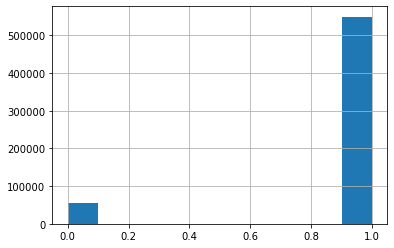

In [52]:
acs_ind1.internet_access.hist()

<AxesSubplot:>

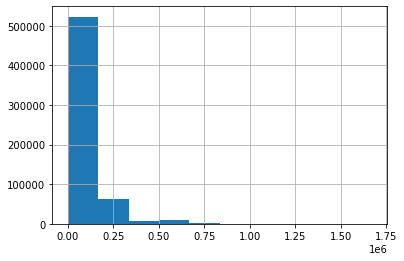

In [53]:
acs_ind1.family_income.hist()

In [86]:
len(acs_ind1[acs_ind1['family_income']>=400000])

14715

In [87]:
len(acs_ind1[acs_ind1['family_income']>=500000])

11401

#### Visualizations

<AxesSubplot:xlabel='internet_access', ylabel='family_income'>

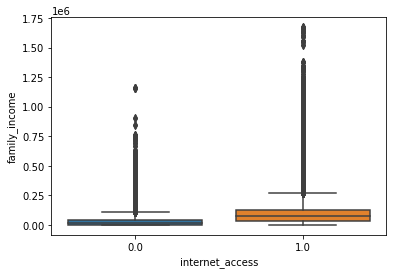

In [72]:

sns.boxplot(x="internet_access", y="family_income", data=acs_ind1)

In [80]:
count_no_int = len(acs_ind[acs_ind['internet_access']==0])
count_int = len(acs_ind[acs_ind['internet_access']==1])
pct_of_int = count_int/(count_no_int+count_int)
print("percentage with internet access is", pct_of_int*100)
pct_of_sub = count_no_int/(count_no_int+count_int)
print("percentage with no internet access", pct_of_sub*100)

percentage with internet access is 90.9764767796324
percentage with no internet access 9.023523220367593


- correlation matrix
- can we have a list of indepdent variables might impact access
- control for covariances 
- then get impact of the indepdent variables 


#### Logistic Regression

In [88]:
#take log of income 
#coefficient small , large income
# might not have to split bc we not predicting

In [75]:
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import logit

In [76]:
#train_data, test_data = train_test_split(acs_ind1, test_size=0.2)

In [99]:
formula=("internet_access ~ log_family_income")

model=logit(formula=formula, data=acs_ind1).fit()

Optimization terminated successfully.
         Current function value: 0.213742
         Iterations 7


In [100]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        internet_access   No. Observations:               495817
Model:                          Logit   Df Residuals:                   495815
Method:                           MLE   Df Model:                            1
Date:                Wed, 02 Mar 2022   Pseudo R-squ.:                 0.07420
Time:                        10:50:19   Log-Likelihood:            -1.0598e+05
converged:                       True   LL-Null:                   -1.1447e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -5.2214      0.060    -87.070      0.000      -5.339      -5.104
log_family_income     0.7246      0.006    130.031      0.000       0.714       0.736
=====================================================================================
"""

Each one-unit change in family income will increase the log odds of having internet access by 0.72, and its p-value indicates that it is significant.


###### Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression

In [30]:
from sklearn import linear_model

In [55]:
# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(acs_ind1, columns=["family_income"])

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(acs_ind1, columns=["internet_access"])

In [56]:
X = df
y = target["internet_access"]

In [62]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

LinearRegression()

In [58]:
lm.score(X,y)

0.03187834901890374

This is the R² score of our model or the percentage of explained variance of the predictions. It is extremely low 3.1%, and represents a model that does explains a tiny amount of the variation in internet access around its mean. 

In [59]:
lm.coef_
#0.00000047384367

array([4.7384367e-07])

In [60]:
lm.intercept_

0.8665289196155742

#### OLS Regression

In [40]:
import statsmodels.api as sm

In [51]:
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        internet_access   R-squared (uncentered):                   0.431
Model:                            OLS   Adj. R-squared (uncentered):              0.431
Method:                 Least Squares   F-statistic:                          4.581e+05
Date:                Wed, 02 Mar 2022   Prob (F-statistic):                        0.00
Time:                        08:38:52   Log-Likelihood:                     -6.5836e+05
No. Observations:              604254   AIC:                                  1.317e+06
Df Residuals:                  604253   BIC:                                  1.317e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
family_income  4.431e-06   6.55e-09    676.807      0.000    4.42e-06    4.44e-06
==============================================================================
Omnibus:                   341957.469   Durbin-Watson:                   0.404
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4086005.767
Skew:                          -2.510   Prob(JB):                         0.00
Kurtosis:                      14.708   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- OLS stands for Ordinary Least Squares and the method “Least Squares” means that we’re trying to fit a regression line that would minimize the square of distance from the regression line (see the previous section of this post).
- The coefficient of 0.0109 (4.431e-06) means that as the family_income variable increases by 1, the predicted value of internet access increases by 0.0109.
- Family income accounts for 43% of the variance in internet access.